In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np

diabetes = load_diabetes()

df_x = diabetes.data
df_y = diabetes.target

f = len(df_x[1])

In [2]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [3]:
W = np.random.rand(f)
b = np.random.rand()

def model(x_data, weight, bias):
    predictions = 0
    for i in range(f):
        predictions += x_data[:, i] * weight[i]
    predictions += bias
    return predictions

In [4]:
def loss(x_data, weight, bias, y_data):
    predictions = model(x_data, weight, bias)
    return ((predictions - y_data) ** 2).mean()

In [5]:
def gradient(x_data, weight, bias, y_data):
    y_pred = model(x_data, weight, bias)
    dW = (1 / len(y_data)) * 2 * x_data.T.dot(y_pred - y_data)
    db = 2 * (y_pred - y_data).mean()
    return dW, db

In [16]:
LEARNING_RATE = 0.1

In [17]:
losses = []
epoch = 10000
for i in range(1, epoch + 1):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 2972.4170
Iteration 2000 : Loss 2930.9925
Iteration 3000 : Loss 2913.4761
Iteration 4000 : Loss 2905.5857
Iteration 5000 : Loss 2901.7733
Iteration 6000 : Loss 2899.7799
Iteration 7000 : Loss 2898.6405
Iteration 8000 : Loss 2897.9223
Iteration 9000 : Loss 2897.4211
Iteration 10000 : Loss 2897.0363


In [12]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3054.000522934211

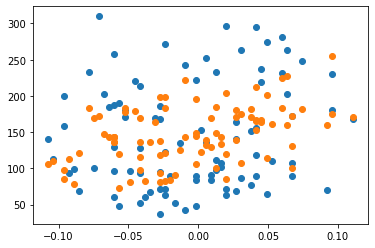

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()